# Credit Card Default Prediction and Customer Segmentation  
### Using Machine Learning


**Technique Used:** Supervised & Unsupervised Learning

### This project focuses on predicting whether a credit card customer will default on payment in the next month using machine learning techniques. It also includes customer segmentation using clustering. 

## 1. Introduction

Predictive analytics is a branch of data analytics that uses historical data and machine learning techniques to predict future outcomes. In the financial sector, predicting customer behavior such as credit card default is very important to reduce financial risk.

Machine Learning is a technique in which systems learn patterns from data and make predictions without being explicitly programmed. Machine learning is mainly divided into two types: supervised learning and unsupervised learning.

In this project, supervised learning algorithms are used to predict whether a customer will default on credit card payment, while unsupervised learning is used to group customers into different clusters based on their behavior.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.cluster import KMeans



# Load Dataset...

In [2]:
df = pd.read_csv("credit_default_data.csv", header=1)

# Dataset preview
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Basic Dataset Information

In [3]:
print("Shape of dataset:", df.shape)
print("\nDataset Info:\n")
df.info()
print("\nDescribe is: \n",df.describe)
print("\nMissing values per column:\n")
df.isnull().sum()
print("\nColumns are:- \n",df.columns)


Shape of dataset: (30000, 25)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2      

# Data Cleaning

In [4]:
# Removing ID column as it is only a serial number
df.drop(columns=['ID'], inplace=True)

# Renaming target column for simplicity
df.rename(columns={'default payment next month': 'default'}, inplace=True)
print(df.columns)

# Fixing invalid category values
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

df[['EDUCATION', 'MARRIAGE']].head()

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')


,EDUCATION,MARRIAGE
0,2,1
1,2,2
2,2,2
3,2,1
4,2,1


# EXPLORATORY DATA ANALYSIS (EDA)

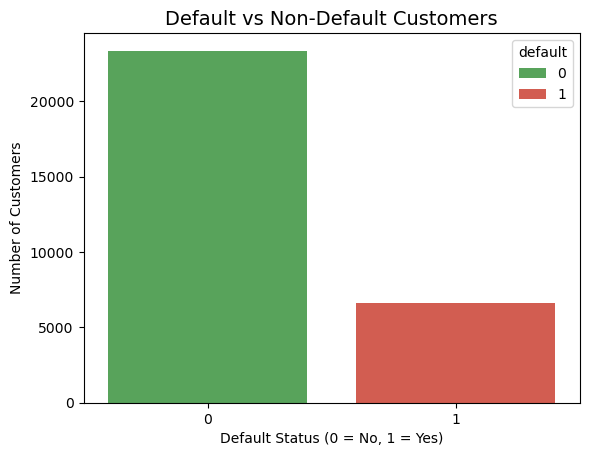

In [5]:
# 1.Default Distribution

sns.countplot(
        x='default',
        hue='default',
        data=df,
        palette=["#4CAF50", "#E74C3C"],
        legend=True
    )
plt.title("Default vs Non-Default Customers", fontsize=14)
plt.xlabel("Default Status (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

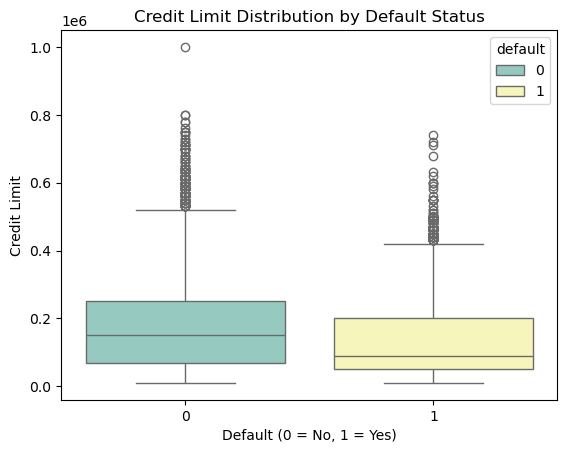

In [6]:
# #2.Credit Limit vs Default

sns.boxplot(
    x='default',
    y='LIMIT_BAL',
    hue='default',
    data=df,
    palette="Set3"
)
plt.title("Credit Limit Distribution by Default Status")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Credit Limit")
plt.show()

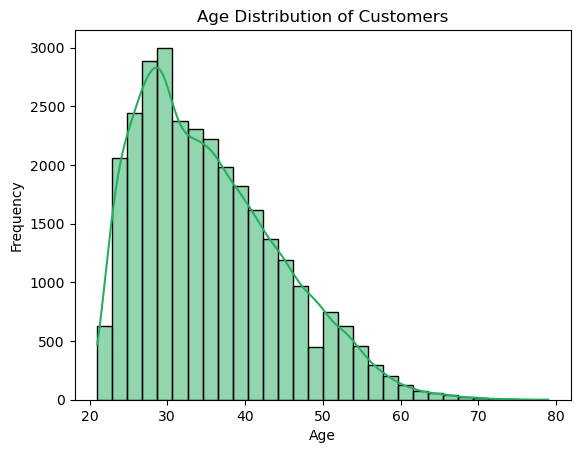

In [7]:
# #3. Age Distribution

sns.histplot(
    df['AGE'],
    bins=30,
    kde=True,
    color="#27AE60"
)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

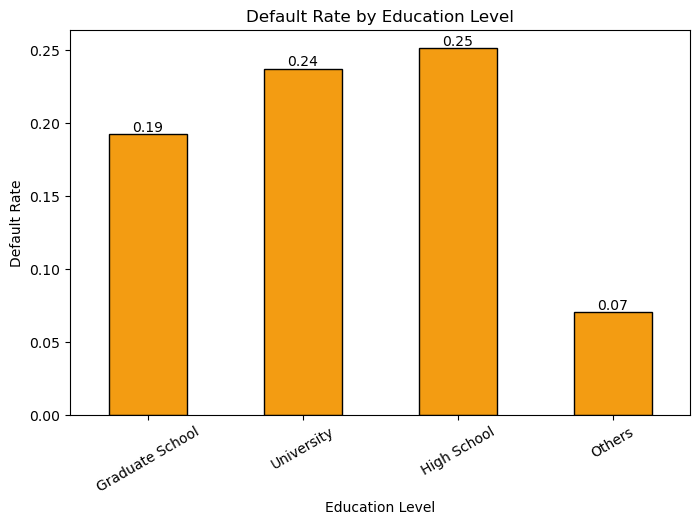

In [8]:
#Default Rate by Education Level

default_by_edu = df.groupby('EDUCATION')['default'].mean()
edu_labels = {
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Others"
}

default_by_edu = default_by_edu.rename(index=edu_labels)
plt.figure(figsize=(8, 5))

ax = default_by_edu.plot(
    kind='bar',
    color="#F39C12",
    edgecolor='black'
)

plt.title("Default Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Default Rate")
plt.xticks(rotation=30)

# adding values on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        round(height, 2),
        ha='center',
        va='bottom'
    )

plt.show()

# #The dataset stores education as numeric codes.
# #I mapped those codes to meaningful education levels like High School and University for better interpretation.


# FEATURE SELECTION & SCALING

In [9]:
X = df.drop('default', axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Regression Model – Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


MAE: 0.30661343818157927
RMSE: 0.15065432157176148
R2 Score: 0.11869869089326768


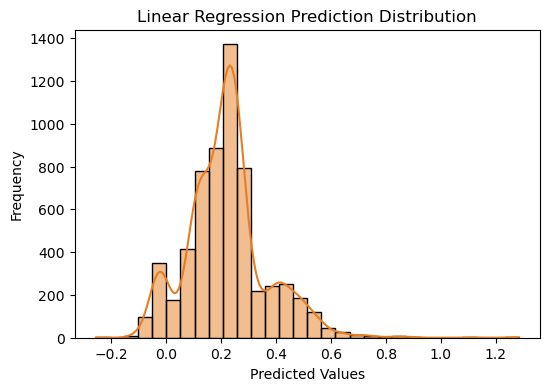

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(y_pred_lr, bins=30, kde=True, color='#E67E22')
plt.title("Linear Regression Prediction Distribution")
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.show()

# “Although Linear Regression was applied, classification models were more suitable due to the binary nature of the target variable.”

# LOGISTIC REGRESSION

In [12]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.81
[[4551  136]
 [1004  309]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



# DECISION TREE CLASSIFIER

In [13]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.819
[[4431  256]
 [ 830  483]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



# K-NEAREST NEIGHBORS (KNN)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7958333333333333
[[4302  385]
 [ 840  473]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4687
           1       0.55      0.36      0.44      1313

    accuracy                           0.80      6000
   macro avg       0.69      0.64      0.66      6000
weighted avg       0.77      0.80      0.78      6000



# SUPPORT VECTOR MACHINE (SVM)

In [15]:
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state=42, max_iter=5000)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8013333333333333
[[4595   92]
 [1100  213]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4687
           1       0.70      0.16      0.26      1313

    accuracy                           0.80      6000
   macro avg       0.75      0.57      0.57      6000
weighted avg       0.78      0.80      0.75      6000



# MODEL COMPARISON

In [16]:
  comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_svm)
    ]
})
comparison

,Model,Accuracy
0,Logistic Regression,0.810000
1,Decision Tree,0.819000
2,KNN,0.795833
3,SVM,0.801333


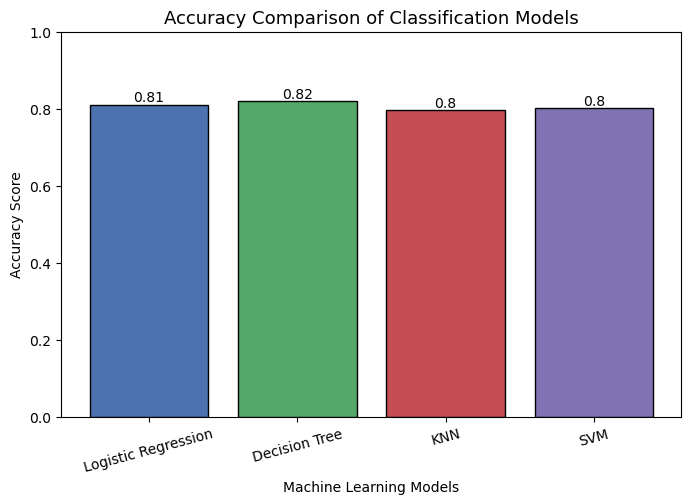

In [17]:
plt.figure(figsize=(8,5))
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3'] 

bars = plt.bar(
    comparison['Model'],
    comparison['Accuracy'],
    color=colors,
    edgecolor='black'
)

plt.title("Accuracy Comparison of Classification Models", fontsize=13)
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.ylim(0,1)
plt.xticks(rotation=15)

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        round(height, 2),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()

# K-MEANS CLUSTERING 

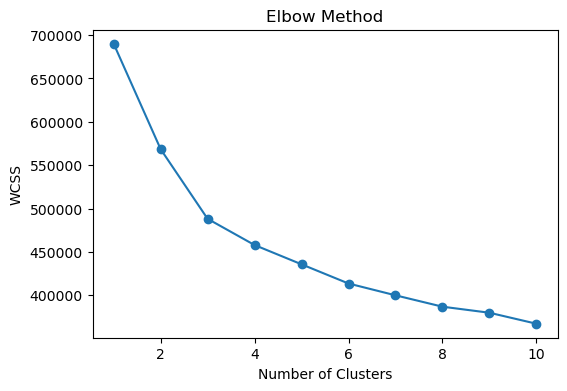

In [18]:
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show() 


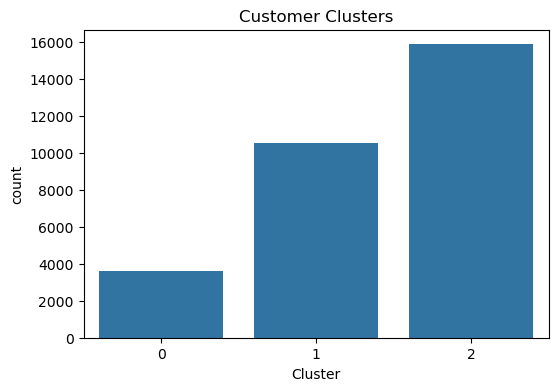

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=df)
plt.title("Customer Clusters")
plt.show()

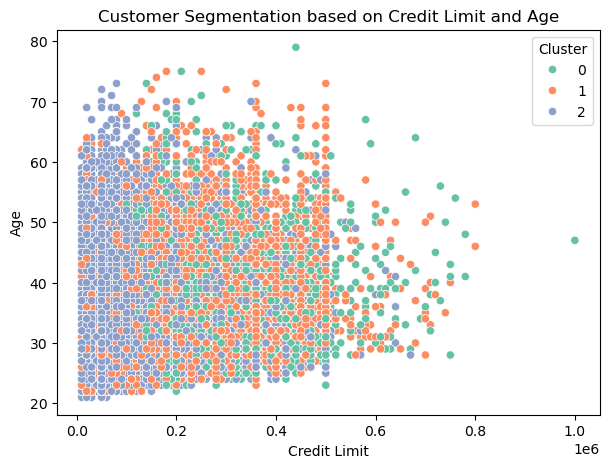

In [20]:
plt.figure(figsize=(7,5))
    
sns.scatterplot(
    x='LIMIT_BAL',
    y='AGE',
    hue='Cluster',
    data=df,
    palette='Set2'
)
plt.title("Customer Segmentation based on Credit Limit and Age")
plt.xlabel("Credit Limit")
plt.ylabel("Age")
plt.legend(title="Cluster")
plt.show()

### Cluster Interpretation:
The scatter plot visualizes customer segmentation based on credit limit and age.
K-Means clustering grouped customers into three distinct clusters, where each
cluster represents customers with similar financial behavior.

## Conclusion
In this project, different machine learning techniques were applied to analyze customer default behavior. Exploratory data analysis helped in understanding the data distribution and identifying important patterns. Classification models such as Logistic Regression, Decision Tree, KNN, and SVM were used to predict credit card default, and their performances were compared using accuracy.

Among the classification models, Logistic Regression and Support Vector Machine (SVM) performed better compared to other models, making them more suitable for this prediction task.

Unsupervised learning using K-Means clustering was applied to segment customers based on their characteristics. The clustering results were visualized using scatter plots, which provided clear insights into different customer groups.

Although the models achieved reasonable accuracy, performance can be further improved using feature selection techniques or ensemble models.

Overall, this project demonstrates the practical application of supervised and unsupervised machine learning techniques in predictive analytics within the financial domain.